In [2]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import display
from abc import ABC, abstractmethod
from scipy.spatial import cKDTree # Para otimização do 1-NN
from typing import Dict, List, Tuple, Any
from compara_todos import compara_todos 

# Testes

In [3]:
Nr = 50      # Número de rodadas
Ptrain = 80  # Percentual de treino

--- CARREGANDO DADOS DE 'recfaces400PCA98var_boxcox.dat' ---

--- INICIANDO AVALIAÇÃO DOS CLASSIFICADORES (50 repetições, 80% treino) ---
Avaliando: QDA (Quadrático)...
Classificador: QDA (Quadrático)
Executando QDA...
{np.int64(1): array([[ 2.39260989e+00,  1.49058127e+00, -1.12975866e-01, ...,
        -1.28698362e-01, -1.49906218e-02, -1.63463123e-01],
       [ 1.49058127e+00,  7.79611678e+00,  1.61991913e+00, ...,
        -2.96947923e-01, -1.46759642e-01, -2.18266754e-01],
       [-1.12975866e-01,  1.61991913e+00,  5.50954817e-01, ...,
        -7.01199933e-02,  2.21051260e-03, -1.02523043e-01],
       ...,
       [-1.28698362e-01, -2.96947923e-01, -7.01199933e-02, ...,
         4.95298317e-02, -4.64259635e-03,  6.39556606e-02],
       [-1.49906218e-02, -1.46759642e-01,  2.21051260e-03, ...,
        -4.64259635e-03,  3.19190768e-02, -1.51487554e-02],
       [-1.63463123e-01, -2.18266754e-01, -1.02523043e-01, ...,
         6.39556606e-02, -1.51487554e-02,  1.13366243e-01]],
      shap

,Média (%),Mínimo (%),Máximo (%),Mediana (%),Desvio Padrão,Tempo (s)
QDA (Quadrático),18.06,9.09,33.33,18.18,4.96,1.88
Variante 1 (Tikhonov λ=0.01),86.79,78.79,96.97,87.88,5.06,2.19
Variante 2 (Covariance Pooled),96.97,87.88,100.00,96.97,2.97,9.12
Variante 3 (Friedman λ=0.5),95.70,81.82,100.00,96.97,3.84,4.43
Variante 4 (Naive Bayes),71.64,48.48,90.91,72.73,9.62,2.33
MaxCorr,86.73,75.76,96.97,87.88,4.69,0.04
DMC,86.73,66.67,96.97,87.88,6.30,0.03
1-NN,89.27,78.79,100.00,90.91,5.69,0.05


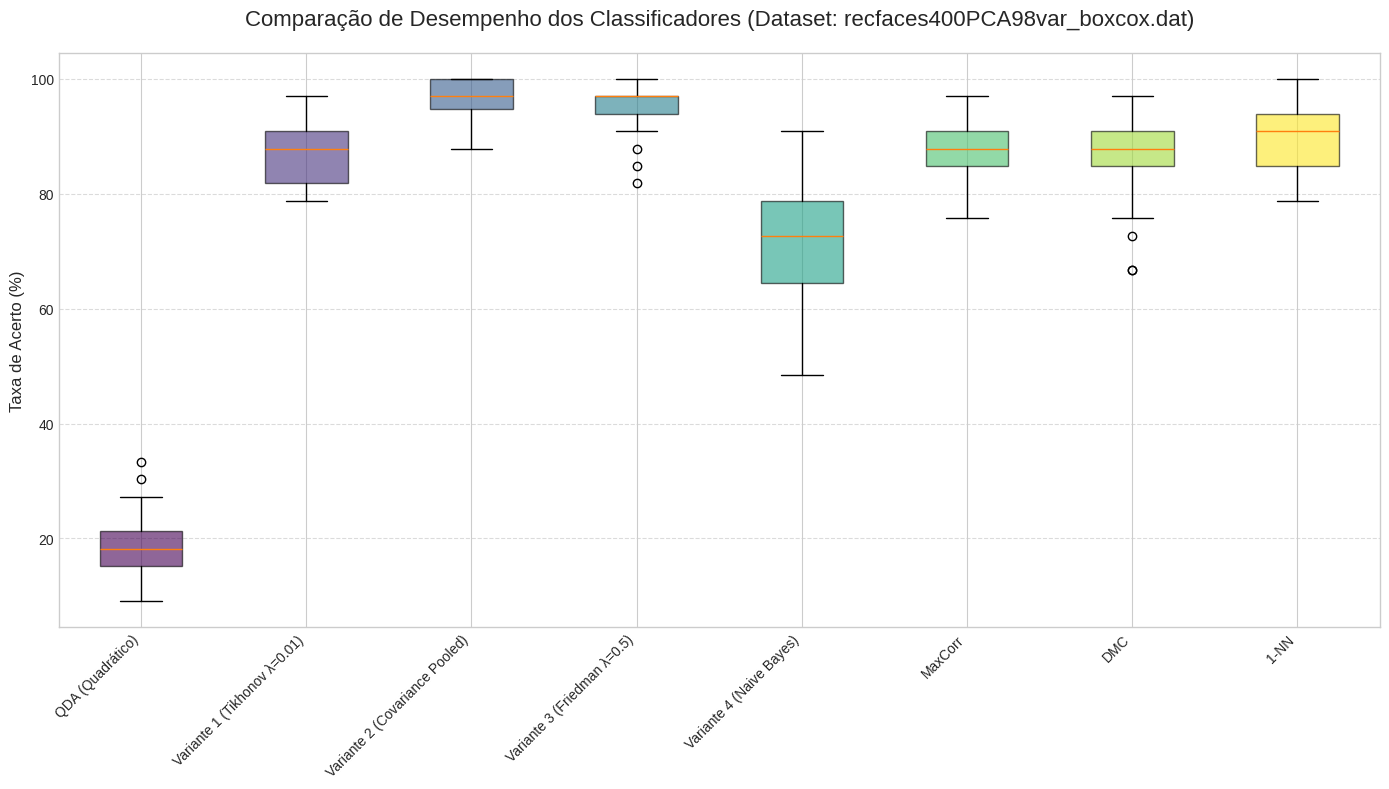

,Média (%),Mínimo (%),Máximo (%),Mediana (%),Desvio Padrão,Tempo (s)
QDA (Quadrático),18.06,9.09,33.33,18.18,4.96,1.88
Variante 1 (Tikhonov λ=0.01),86.79,78.79,96.97,87.88,5.06,2.19
Variante 2 (Covariance Pooled),96.97,87.88,100.00,96.97,2.97,9.12
Variante 3 (Friedman λ=0.5),95.70,81.82,100.00,96.97,3.84,4.43
Variante 4 (Naive Bayes),71.64,48.48,90.91,72.73,9.62,2.33
MaxCorr,86.73,75.76,96.97,87.88,4.69,0.04
DMC,86.73,66.67,96.97,87.88,6.30,0.03
1-NN,89.27,78.79,100.00,90.91,5.69,0.05


In [4]:
results = compara_todos('recfaces400PCA98var_boxcox.dat', Nr, Ptrain)
display(results[0])

In [5]:
last_run_data = results[1]


# Calculando e imprimindo o posto de cada matriz
print("Posto (Rank) das Matrizes de Covariância por Classe:")
print("-" * 50)
print(f"{'Classe':<10} | {'Dimensão':<15} | {'Posto (Rank)':<15}")
print("-" * 50)


for class_label in ["QDA (Quadrático)", "Variante 1 (Tikhonov λ=0.01)", "Variante 2 (Covariance Pooled)", "Variante 3 (Friedman λ=0.5)", "Variante 4 (Naive Bayes)"]:
    print(class_label)
    for key in last_run_data[class_label]['model_params']['covariances']:
        matrix = last_run_data[class_label]['model_params']['covariances'][key]
        rank = np.linalg.matrix_rank(matrix)
        print(f"{class_label:<10} | {str(matrix.shape):<15} | {rank:<15}")


Posto (Rank) das Matrizes de Covariância por Classe:
--------------------------------------------------
Classe     | Dimensão        | Posto (Rank)   
--------------------------------------------------
QDA (Quadrático)
QDA (Quadrático) | (63, 63)        | 8              
QDA (Quadrático) | (63, 63)        | 6              
QDA (Quadrático) | (63, 63)        | 8              
QDA (Quadrático) | (63, 63)        | 7              
QDA (Quadrático) | (63, 63)        | 7              
QDA (Quadrático) | (63, 63)        | 6              
QDA (Quadrático) | (63, 63)        | 5              
QDA (Quadrático) | (63, 63)        | 7              
QDA (Quadrático) | (63, 63)        | 8              
QDA (Quadrático) | (63, 63)        | 8              
QDA (Quadrático) | (63, 63)        | 9              
QDA (Quadrático) | (63, 63)        | 7              
QDA (Quadrático) | (63, 63)        | 8              
QDA (Quadrático) | (63, 63)        | 8              
QDA (Quadrático) | (63, 63)        | 8 